# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [2]:
inspections = pd.read_csv("data/inspections.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

**Show 5 random rows from the dataset:**

In [3]:
inspections.sample(5)

,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude
391513,23250-2016-ENFO,50068532,SUGARHILLS CANDY STORE CORP.,04/14/2016,No Violation Issued,Cigarette Retail Dealer - 127,Manhattan,63,AVENUE D,NaN,NaN,NaN,NaN,NEW YORK,NY,10009.0,-73.977232,40.722051
185993,64230-2015-ENFO,70032990,786 GROCERY SMOKE SHOP INC,11/12/2015,Violation Issued,Cigarette Retail Dealer - 127,Brooklyn,786,NEW LOTS AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11208.0,-73.881529,40.666866
393297,61122-2014-ENFO,03024243,"REGO PARK AJ MET, INC.",10/28/2014,Pass,Supermarket - 819,Queens,9736,63RD RD,NaN,NaN,NaN,NaN,REGO PARK,NY,11374.0,-73.860192,40.731257
105092,16410-2020-ENFO,20N00079,472 MCDONALD AVENUE FOOD CORP.,08/05/2020,Violation Issued,Grocery-Retail - 808,Brooklyn,472,MCDONALD AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11218.0,-77.519855,40.112490
211282,27040-2015-ENFO,09259906,"EASTERN PAINT INDUSTRIES, INC.",05/07/2015,No Violation Issued,Misc Non-Food Retail - 817,Brooklyn,1851,FLATBUSH AVE,NaN,NaN,NaN,NaN,BROOKLYN,NY,11210.0,-73.939058,40.624699


**Show columns and data types:**

In [4]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539874 entries, 0 to 539873
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Record ID           539874 non-null  object 
 1   Certificate Number  539874 non-null  object 
 2   Business Name       535731 non-null  object 
 3   Inspection Date     539874 non-null  object 
 4   Inspection Result   539874 non-null  object 
 5   Industry            539445 non-null  object 
 6   Borough             539109 non-null  object 
 7   Building Number     532297 non-null  object 
 8   Street              534922 non-null  object 
 9   Street 2            9555 non-null    object 
 10  Unit Type           29397 non-null   object 
 11  Unit                31095 non-null   object 
 12  Description         12680 non-null   object 
 13  City                539231 non-null  object 
 14  State               538545 non-null  object 
 15  Zip                 539192 non-nul

**Unique Feature:**  
We can see that almost all of the rows have missing values, but that is likely because there a several columns with fields that are optional when it comes to data entry such as, "Street 2", "Unit", and "Description".

In [5]:
sum_missing = np.sum(inspections.isnull().any(axis=1))
print(inspections.shape)
sum_missing

(539874, 18)


539873

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

**Dealing with missing data:**  
As shown above almost every row has some missing value due to sevearl of the fields being optional. Therefore, I will only take out rows with missing values in fields that are relevant to my analysis.

In [6]:
inspections_cleaned = inspections.dropna(subset=['Business Name','Industry','Inspection Result','Borough'])
inspections_cleaned.head()

,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude
0,16005-2019-ENFO,05439358,STAY FRESH DELI & GRILL CORP.,03/14/2019,Violation Issued,Grocery-Retail - 808,Brooklyn,1695A,BROADWAY,NaN,NaN,NaN,NaN,BROOKLYN,NY,11207.0,-73.912103,40.683851
1,62345-2018-ENFO,03090119,DOWNTOWN BRONX DELI CORP.,12/07/2018,Pass,Grocery-Retail - 808,Bronx,622,MELROSE AVE,NaN,NaN,NaN,NaN,BRONX,NY,10455.0,-73.916955,40.817842
2,52836-2019-ENFO,09466854,"SHIM, JAE TAEK",10/04/2019,Out of Business,Misc Non-Food Retail - 817,Queens,7952,ALBION AVE,NaN,NaN,NaN,NaN,ELMHURST,NY,11373.0,-73.884388,40.739252
3,2078462-DCA,09444093,JZ CLEANERS 2 INC,12/10/2018,Warning,Laundries,Manhattan,365,E 62ND ST,NaN,NaN,NaN,NaN,NEW YORK,NY,10065.0,-73.961278,40.761783
4,23282-2020-ENFO,A0006625,OFFICE SUPERSTORE EAST LLC,09/22/2020,No Warning Issued,Misc Non-Food Retail - 817,Manhattan,641,6TH AVE,NaN,NaN,NaN,NaN,NEW YORK,NY,10011.0,-77.519855,40.112490


**Concatenating address columns:**  
Concatenating the address columns into one column named 'Address'

In [8]:
inspections_cleaned['Zip']=inspections_cleaned['Zip'].fillna(0).astype(int)
inspections_cleaned['Address'] =( 
    inspections_cleaned['Building Number'].fillna('')+' '+
    inspections_cleaned['Street'].fillna('')+' '+
    inspections_cleaned['Street 2'].fillna('')+' '+
    inspections_cleaned['Unit Type'].fillna('')+' '+
    inspections_cleaned['Unit'].fillna('')+' '+
    inspections_cleaned['City'].fillna('')+', '+
    inspections_cleaned['State'].fillna('')+' '+
    inspections_cleaned['Zip'].astype(str)
)
inspections_cleaned.head()

<ipython-input-8-28fed09c1b7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspections_cleaned['Zip']=inspections_cleaned['Zip'].fillna(0).astype(int)
<ipython-input-8-28fed09c1b7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspections_cleaned['Address'] =(


,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude,Address
0,16005-2019-ENFO,05439358,STAY FRESH DELI & GRILL CORP.,03/14/2019,Violation Issued,Grocery-Retail - 808,Brooklyn,1695A,BROADWAY,NaN,NaN,NaN,NaN,BROOKLYN,NY,11207,-73.912103,40.683851,"1695A BROADWAY BROOKLYN, NY 11207"
1,62345-2018-ENFO,03090119,DOWNTOWN BRONX DELI CORP.,12/07/2018,Pass,Grocery-Retail - 808,Bronx,622,MELROSE AVE,NaN,NaN,NaN,NaN,BRONX,NY,10455,-73.916955,40.817842,"622 MELROSE AVE BRONX, NY 10455"
2,52836-2019-ENFO,09466854,"SHIM, JAE TAEK",10/04/2019,Out of Business,Misc Non-Food Retail - 817,Queens,7952,ALBION AVE,NaN,NaN,NaN,NaN,ELMHURST,NY,11373,-73.884388,40.739252,"7952 ALBION AVE ELMHURST, NY 11373"
3,2078462-DCA,09444093,JZ CLEANERS 2 INC,12/10/2018,Warning,Laundries,Manhattan,365,E 62ND ST,NaN,NaN,NaN,NaN,NEW YORK,NY,10065,-73.961278,40.761783,"365 E 62ND ST NEW YORK, NY 10065"
4,23282-2020-ENFO,A0006625,OFFICE SUPERSTORE EAST LLC,09/22/2020,No Warning Issued,Misc Non-Food Retail - 817,Manhattan,641,6TH AVE,NaN,NaN,NaN,NaN,NEW YORK,NY,10011,-77.519855,40.112490,"641 6TH AVE NEW YORK, NY 10011"


**Making borough names consistent:**  
Converting all borough names to titlecase. From the grouping analysis below, it is apparent that the borough entries were not consistent

In [9]:
inspections_cleaned['Borough']=inspections_cleaned['Borough'].str.title()
inspections_cleaned.head()

<ipython-input-9-a626c84b029b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspections_cleaned['Borough']=inspections_cleaned['Borough'].str.title()


,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude,Address
0,16005-2019-ENFO,05439358,STAY FRESH DELI & GRILL CORP.,03/14/2019,Violation Issued,Grocery-Retail - 808,Brooklyn,1695A,BROADWAY,NaN,NaN,NaN,NaN,BROOKLYN,NY,11207,-73.912103,40.683851,"1695A BROADWAY BROOKLYN, NY 11207"
1,62345-2018-ENFO,03090119,DOWNTOWN BRONX DELI CORP.,12/07/2018,Pass,Grocery-Retail - 808,Bronx,622,MELROSE AVE,NaN,NaN,NaN,NaN,BRONX,NY,10455,-73.916955,40.817842,"622 MELROSE AVE BRONX, NY 10455"
2,52836-2019-ENFO,09466854,"SHIM, JAE TAEK",10/04/2019,Out of Business,Misc Non-Food Retail - 817,Queens,7952,ALBION AVE,NaN,NaN,NaN,NaN,ELMHURST,NY,11373,-73.884388,40.739252,"7952 ALBION AVE ELMHURST, NY 11373"
3,2078462-DCA,09444093,JZ CLEANERS 2 INC,12/10/2018,Warning,Laundries,Manhattan,365,E 62ND ST,NaN,NaN,NaN,NaN,NEW YORK,NY,10065,-73.961278,40.761783,"365 E 62ND ST NEW YORK, NY 10065"
4,23282-2020-ENFO,A0006625,OFFICE SUPERSTORE EAST LLC,09/22/2020,No Warning Issued,Misc Non-Food Retail - 817,Manhattan,641,6TH AVE,NaN,NaN,NaN,NaN,NEW YORK,NY,10011,-77.519855,40.112490,"641 6TH AVE NEW YORK, NY 10011"


**Converting Inspection Date data type to datetime:**

In [10]:
inspections_cleaned['Inspection Date']=inspections_cleaned['Inspection Date'].astype('datetime64')
inspections_cleaned.head()

<ipython-input-10-a8a46b75a35c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspections_cleaned['Inspection Date']=inspections_cleaned['Inspection Date'].astype('datetime64')


,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude,Address
0,16005-2019-ENFO,05439358,STAY FRESH DELI & GRILL CORP.,2019-03-14,Violation Issued,Grocery-Retail - 808,Brooklyn,1695A,BROADWAY,NaN,NaN,NaN,NaN,BROOKLYN,NY,11207,-73.912103,40.683851,"1695A BROADWAY BROOKLYN, NY 11207"
1,62345-2018-ENFO,03090119,DOWNTOWN BRONX DELI CORP.,2018-12-07,Pass,Grocery-Retail - 808,Bronx,622,MELROSE AVE,NaN,NaN,NaN,NaN,BRONX,NY,10455,-73.916955,40.817842,"622 MELROSE AVE BRONX, NY 10455"
2,52836-2019-ENFO,09466854,"SHIM, JAE TAEK",2019-10-04,Out of Business,Misc Non-Food Retail - 817,Queens,7952,ALBION AVE,NaN,NaN,NaN,NaN,ELMHURST,NY,11373,-73.884388,40.739252,"7952 ALBION AVE ELMHURST, NY 11373"
3,2078462-DCA,09444093,JZ CLEANERS 2 INC,2018-12-10,Warning,Laundries,Manhattan,365,E 62ND ST,NaN,NaN,NaN,NaN,NEW YORK,NY,10065,-73.961278,40.761783,"365 E 62ND ST NEW YORK, NY 10065"
4,23282-2020-ENFO,A0006625,OFFICE SUPERSTORE EAST LLC,2020-09-22,No Warning Issued,Misc Non-Food Retail - 817,Manhattan,641,6TH AVE,NaN,NaN,NaN,NaN,NEW YORK,NY,10011,-77.519855,40.112490,"641 6TH AVE NEW YORK, NY 10011"


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

**Grouping inspections by industry:**  
values sorted in descending order to find which industry has the most inspections

In [11]:
grouped_industry=inspections_cleaned.groupby('Industry')['Industry'].count().sort_values(ascending=False)
grouped_industry

Industry
Cigarette Retail Dealer - 127          85508
Grocery-Retail - 808                   79200
Misc Non-Food Retail - 817             47489
Tobacco Retail Dealer                  43358
Salons And Barbershop - 841            27070
                                       ...  
Tickets-Live Perf - 260                    1
Auto Leasing - 211                         1
Process Server (Organization) - 109        1
Locksmith Apprentice - 063                 1
Internet Complaints - 443                  1
Name: Industry, Length: 106, dtype: int64

**Grouping inspections by NYC boroughs:**

In [12]:
grouped_borough=inspections_cleaned.groupby('Borough')['Borough'].count()
grouped_borough

Borough
Bronx             85279
Brooklyn         162943
Manhattan        133760
Outside Nyc        1768
Queens           129352
Staten Island     21661
Name: Borough, dtype: int64

**Grouping inspections by inspection results:**

In [13]:
grouped_results=inspections_cleaned.groupby('Inspection Result')['Inspection Result'].count()
grouped_results

Inspection Result
Business Padlocked                   72
Closed                            12398
Completed                            29
Condemned                            22
Confiscated                          13
ECB Summons Issued                  753
ECB Warning Issued                  254
Fail                               6070
License Confiscated                  47
Licensed                            508
NOH Withdrawn                      1135
No Evidence of Activity           19240
No Violation Issued              215962
No Warning Issued                  5501
Out of Business                   53567
Pass                              92153
Posting Order Served                874
Re-inspection                      1166
Residential                         231
Samples Obtained                    144
Unable to Complete Inspection       163
Unable to Locate                   2388
Unable to Seize Vehicle               1
Unidentified Vendor/Business         58
Violation Issued      

**Summarizing mean latitude and longitude based on inspection results:**

In [14]:
inspect_results_meanloc=(
    inspections_cleaned.groupby(inspections_cleaned['Inspection Result']).agg(
        {
            'Inspection Result':['count'],'Latitude':['mean'],'Longitude':['mean']
        }
    )
)
inspect_results_meanloc

,Inspection Result,Latitude,Longitude
,count,mean,mean
Inspection Result,,,
Business Padlocked,72,40.747886,-73.945727
Closed,12398,40.521922,-75.142076
Completed,29,40.731862,-73.980428
Condemned,22,40.755433,-73.925288
Confiscated,13,40.727186,-73.913403
ECB Summons Issued,753,40.718139,-73.982914
ECB Warning Issued,254,40.745040,-73.969000
Fail,6070,40.696010,-74.067040


**Summarizing mean latitude and longitude based on industry:**

In [15]:
industry_meanloc=(
    inspections_cleaned.groupby(inspections_cleaned['Industry']).agg(
        {
            'Industry':['count'],'Latitude':['mean'],'Longitude':['mean']
        }
    )
)
industry_meanloc

,Industry,Latitude,Longitude
,count,mean,mean
Industry,,,
Air Condtioning Law - 899,3845,40.721552,-74.025275
Amusement Arcade - 014,106,40.580958,-74.730472
Amusement Device (Permanent) - 016,176,40.605828,-74.182021
Amusement Device (Portable) - 018,55,40.697443,-73.900756
Amusement Device (Temporary) - 090,38,40.780918,-73.933863
...,...,...,...
Tow Truck Company - 124,7761,40.682516,-74.172740
Tow Truck Driver - 125,64,NaN,NaN


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

**Pie chart showing percentage of inspections by borough:**

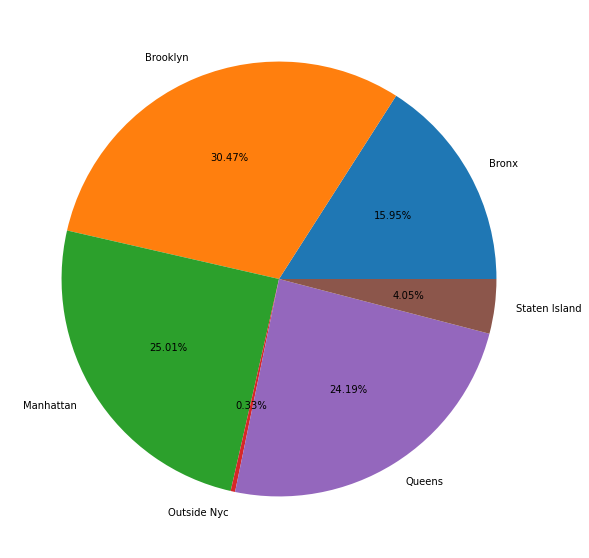

In [16]:
plt.figure(figsize=(10,10))
plt.pie(grouped_borough, labels=grouped_borough.index, autopct=lambda p:f'{p:.2f}%')
plt.show()

**Horizontal bar chart showing the number of inspection results for each result:**

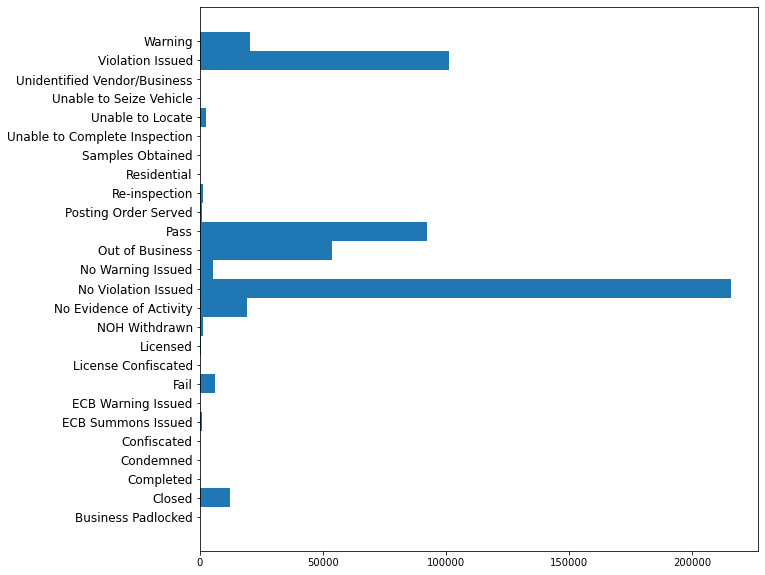

In [17]:
plt.figure(figsize=(10,10))
plt.barh(grouped_results.index, grouped_results, height=1)
plt.yticks(fontsize=12)
plt.show()

**Bar chart showing the distribution of inspections by industry:**  
Shows that the number of inspections are skewed towards certain industries.

Text(0.5, 0, 'Industries')

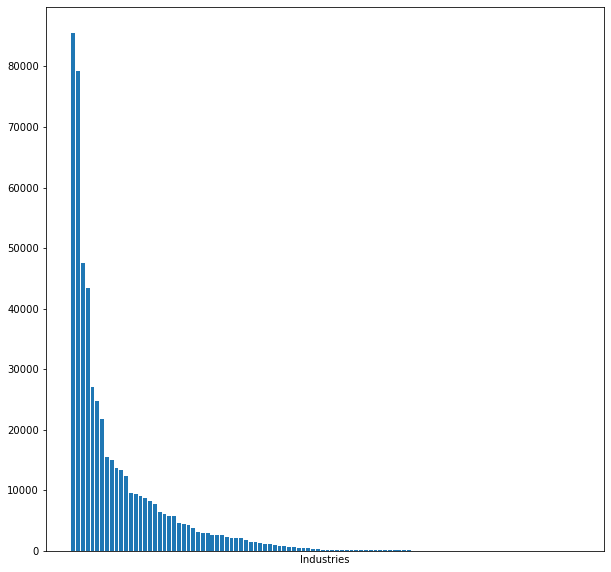

In [18]:
plt.figure(figsize=(10,10))
plt.bar(grouped_industry.index, grouped_industry)
plt.xticks(ticks=[])
plt.xlabel('Industries')

**Hisograms of mean latitudes and longitudes of inspection results:**  
Shows that inspections results are not evenly distributed by area

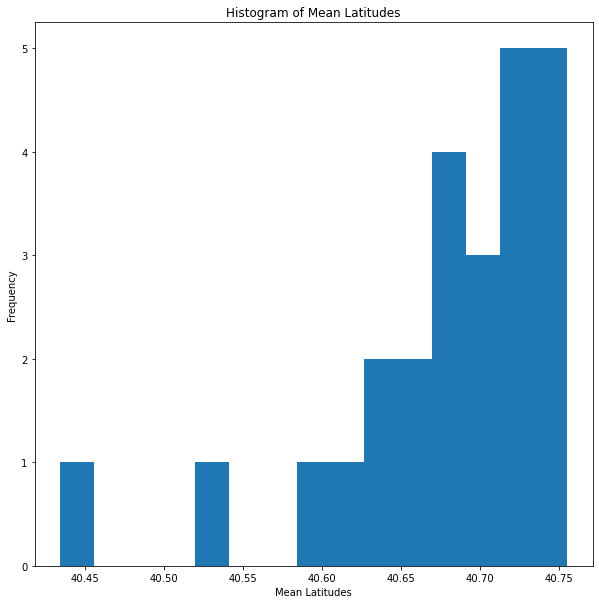

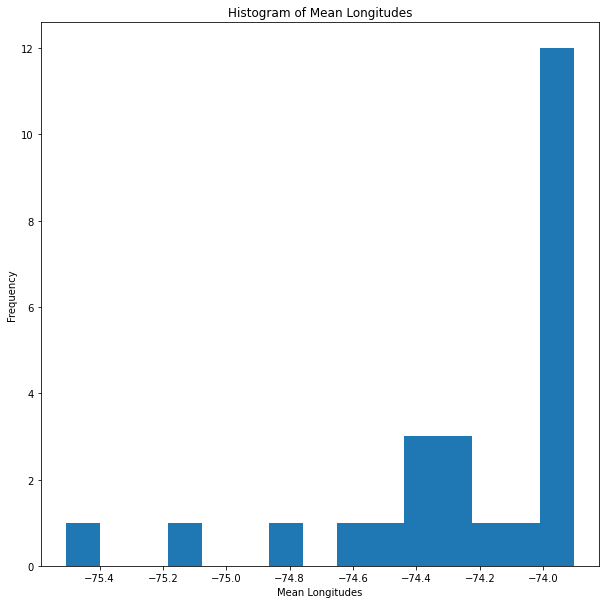

In [62]:
plt.figure(figsize=(10,10))
plt.title('Histogram of Mean Latitudes')
plt.hist(inspect_results_meanloc['Latitude'], bins=15)
plt.xlabel('Mean Latitudes')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10,10))
plt.title('Histogram of Mean Longitudes')
plt.hist(inspect_results_meanloc['Longitude'], bins=15)
plt.xlabel('Mean Longitudes')
plt.ylabel('Frequency')
plt.show()

**Bar chart showing the distribution of inspections by month:**  
Shows a decrease in number of inspections around November and December when there are more holidays

<AxesSubplot:xlabel='Month'>

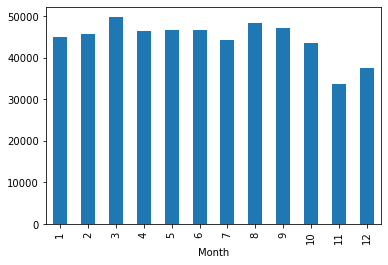

In [61]:
grouped_month = inspections_cleaned.groupby(inspections_cleaned['Inspection Date'].dt.month.rename('Month')).agg({'Inspection Result':['count']})
grouped_month.plot.bar(y=['Inspection Result'],legend=False)